Why do certain hours with low user activity generate disproportionately high revenue? 

Hypothesis 1: High-value products are purchased during these hours 

Hypothesis 2: There could be targeted promotions or sales during these hours

Hypothesis 3: Repeat customers drive revenue during these hours 

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
#Load Dataset

df = pd.read_csv("../data/cleaned/cleaned_data.csv", parse_dates=['event_time'])
df = df.sample(n=50000, random_state=5)
warnings.filterwarnings('ignore')

In [4]:
# Hypothesis 1 

# Load and preprocess the data
df['event_time'] = pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']

purchases['hour'] = purchases['event_time'].dt.hour

#Defining the low and high activity hours 
low_activity_hours = range(4, 9)
high_activity_hours = range(9, 24)

# Split the data by activity levels
low_activity_purchases = purchases[purchases['hour'].isin(low_activity_hours)]
high_activity_purchases = purchases[purchases['hour'].isin(high_activity_hours)]

#Calculate average and median transaction values
low_activity_stats = low_activity_purchases['price'].agg(['mean', 'median'])
high_activity_stats = high_activity_purchases['price'].agg(['mean', 'median'])

print("Low Activity Hours Stats (Mean, Median):")
print(low_activity_stats)
print("\nHigh Activity Hours Stats (Mean, Median):")
print(high_activity_stats)

Low Activity Hours Stats (Mean, Median):
mean      347.998499
median    230.130000
Name: price, dtype: float64

High Activity Hours Stats (Mean, Median):
mean      376.211022
median    243.085000
Name: price, dtype: float64


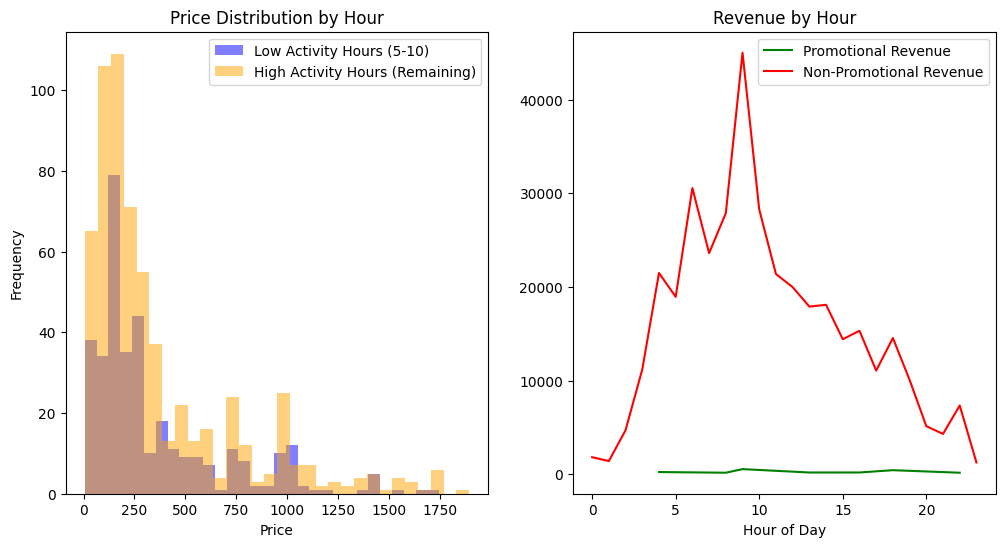

In [5]:
# Hypothesis 2 Part 1

# Create a plot to look at price distribution by hour based on low-activity and high-activity hours 
df['event_time'] - pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']
purchases['hour'] = purchases['event_time'].dt.hour
low_activity_hours = range(4,9)
high_activity_hours = range(9,24)
plt.figure(figsize=(12,6))

# Create Plot for price distribution
plt.subplot(1,2,1)
plt.hist(purchases[purchases['hour'].isin(low_activity_hours)]['price'], bins=30, alpha=0.5, label='Low Activity Hours (5-10)', color='blue')
plt.hist(purchases[purchases['hour'].isin(high_activity_hours)]['price'], bins=30, alpha=0.5, label='High Activity Hours (Remaining)', color='orange')
plt.title('Price Distribution by Hour')
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.legend()

# Try to identify price drops of up to 10% as potential promotions
purchases['price_drop'] = purchases.groupby('product_id')['price'].transform('min') / purchases['price'] < 0.9
plt.subplot(1,2,2)
promo_revenue = purchases[purchases['price_drop']].groupby('hour')['price'].sum()
non_promo_revenue = purchases[~purchases['price_drop']].groupby('hour')['price'].sum()

# Create plot for promotional vs non-promotional purchases
plt.plot(promo_revenue.index, promo_revenue, label='Promotional Revenue', color='green')
plt.plot(non_promo_revenue.index, non_promo_revenue, label='Non-Promotional Revenue', color='red')
plt.title('Revenue by Hour')
plt.xlabel('Hour of Day')
plt.legend()

plt.tight_layout
plt.show()

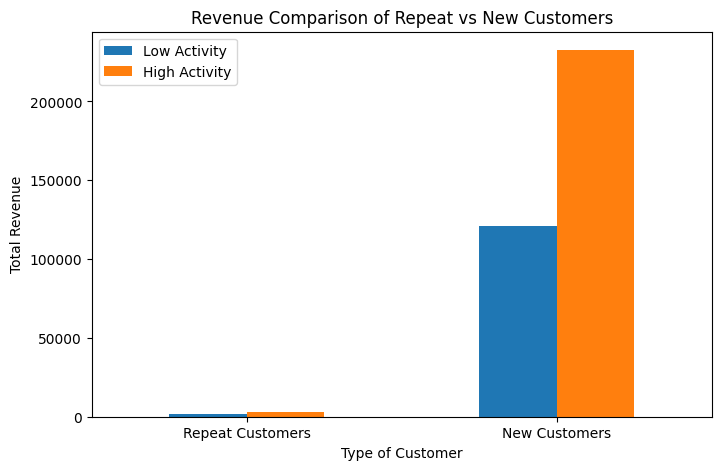

In [6]:
# Hypothesis 3

#Create plot to analyze the revenue of new customers vs repeat customers based on high-activity and low-activity hours
df['event_time'] = pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']
purchases['hour'] = purchases['event_time'].dt.hour

low_activity_hours = range(4,9)
high_activity_hours = range(9,24)

# Identify repeat customers
repeat_customers = purchases.groupby('user_id').filter(lambda x: len(x) > 1)

repeat_low = purchases[(purchases['hour'].isin(low_activity_hours)) & (purchases['user_id'].isin(repeat_customers['user_id']))]
new_low = purchases[(purchases['hour'].isin(low_activity_hours)) & (~purchases['user_id'].isin(repeat_customers['user_id']))]
repeat_high = purchases[(purchases['hour'].isin(high_activity_hours)) & (purchases['user_id'].isin(repeat_customers['user_id']))]
new_high = purchases[(purchases['hour'].isin(high_activity_hours)) & (~purchases['user_id'].isin(repeat_customers['user_id']))]

revenue = {
    'Low Activity': [repeat_low['price'].sum(), new_low['price'].sum()],
    'High Activity': [repeat_high['price'].sum(), new_high['price'].sum()]
}

revenue_df = pd.DataFrame(revenue, index=['Repeat Customers', 'New Customers'])

#Create Plot
revenue_df.plot(kind='bar', figsize=(8,5))
plt.title('Revenue Comparison of Repeat vs New Customers')
plt.ylabel("Total Revenue")
plt.xlabel("Type of Customer")
plt.xticks(rotation = 0)
plt.show()

Findings and Observations (Mirza Baig)

After testing all 3 of the hypotheses, they each gave me an outcome that directly answered the question that was asked. For the first hypothesis, I wanted to test and see if high-value products were being purchased within the low-activity hours. I did this by looking at the mean and median of product prices sold during the low and high-activity hours. My findings indicated that the mean and median of the product prices sold were lower in the low-activity periods as compared to the higher prices sold during high-activity hours. My second hypothesis was to see if there could be targeted promotions or sales during the low-activity hours. I tested this hypothesis by creating two plots. One for looking at the price distribution based on the low-activity and high-activity hours. The second plot was a plot that I created by looking to see if there was a 10% or more price drop on any products within the low-activity hours and comparing the revenue of the low and high-activity hours based on those price-dropped products. From the first plot, I observed that during the low-activity hours, there were a lot more low-priced products that were being sold as compared to the high-activity hours. One thing this could indicate is that there are larger amounts of products purchased by individual users as compared to high activity where there may be singular or no bulk purchases being made. The other plot that I made which was based on the 10% price drop, there were little to no promotions being applied to the products during this time which disproves the hypothesis. The last hypothesis that I tested was to see if repeat customers drove the revenue during the low-activity hours. I made a plot to see the revenue comparison of repeat vs new customers during the low-activity and high-activity hours. This plot indicated to me that, new customers drive a lot more profit during the low-activity hours rather than repeat customers. This could indicate that customers spend a lot more on their first or initial purchases or there could be some marketing that is bringing in new potential customers. Based on the three hypotheses that I tested, they were all disproved by the plots and statistics that I came up with. However, testing these hypotheses gave me new insights into what could be potentially causing this observation. 

Why do certain user sessions have disproportionately high transactions? (Raaid)

Hypothesis 1: Users who engage in multiple interactions with high-value items tend to have higher transactions.

Hypothesis 2: Longer user sessions are associated with higher transactions.

Hypothesis 3: Users who access the platform during certain times of day may hae higher transactions.

High-Value Sessions Stats (Mean, Median):
mean      3.973915
median    0.000000
Name: high_val_session_amt, dtype: float64

All Sessions Stats (Mean, Median):
mean      356.18707
median    220.08000
Name: other_sessions, dtype: float64


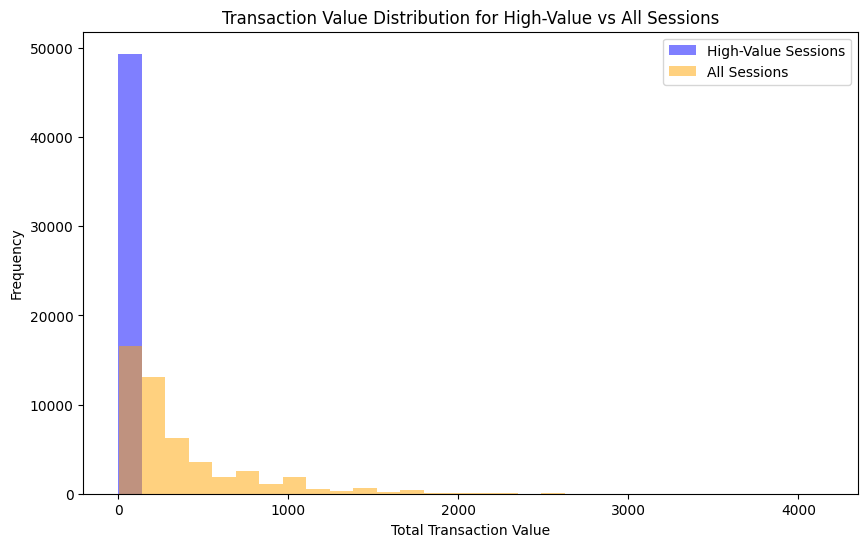

In [18]:
#Hypothesis 1

#Set a price limit for high-value items ($300+)
high_value_threshold = 300
high_value_items = df[df['price'] > high_value_threshold]

#Identify user sessions with multiple high-value interactions
high_value_sessions = high_value_items.groupby('user_session').filter(lambda x: len(x) > 1)

#Total $ per session
high_val_session_amt = high_value_sessions.groupby('user_session')['price'].sum()

#Compared to non high val session amounts
other_sessions = df.groupby('user_session')['price'].sum()

#Compare (Keep .fillna(0) to fill in for sessions that didn't interact with high-value items)
comparison_df = pd.DataFrame({
    'high_val_session_amt': high_val_session_amt,
    'other_sessions': other_sessions
}).fillna(0)

#Compare mean and median
high_val_sessions_stats = comparison_df['high_val_session_amt'].agg(['mean', 'median'])
other_sessions_stats = comparison_df['other_sessions'].agg(['mean', 'median'])

print("High-Value Sessions Stats (Mean, Median):")
print(high_val_sessions_stats)
print("\nAll Sessions Stats (Mean, Median):")
print(other_sessions_stats)

#Plot
plt.figure(figsize=(10, 6))
plt.hist(comparison_df['high_val_session_amt'], bins=30, alpha=0.5, label='High-Value Sessions', color='blue')
plt.hist(comparison_df['other_sessions'], bins=30, alpha=0.5, label='All Sessions', color='orange')
plt.title('Transaction Value Distribution for High-Value vs All Sessions')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Correlation between session duration and total revenue: -0.0007181124388131464


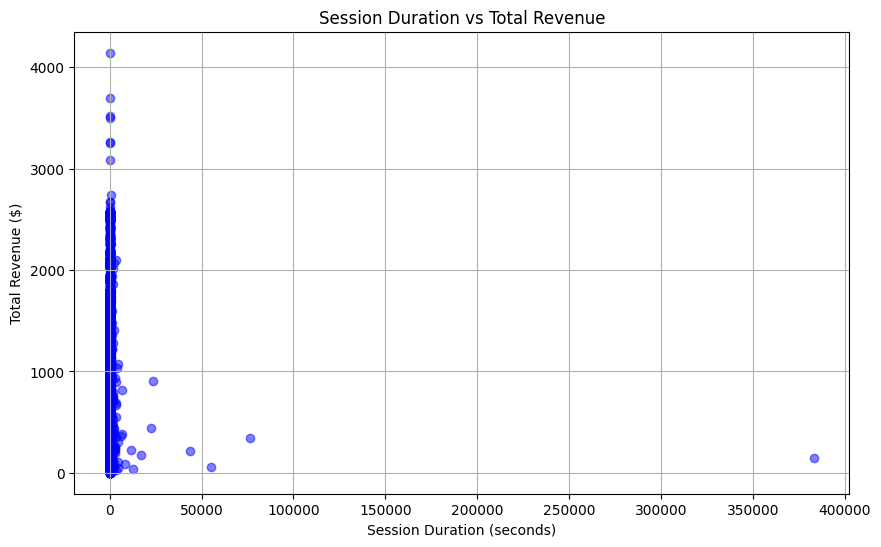

In [19]:
# Hypothesis 2

#Calculate session duration (time between first and last event in each session)
df['event_time'] = pd.to_datetime(df['event_time'])
session_times = df.groupby('user_session')['event_time'].agg(['min', 'max'])
session_times['duration'] = (session_times['max'] - session_times['min']).dt.total_seconds()

#Transaction val per session
session_revenue = df.groupby('user_session')['price'].sum()

#Combine into a single dataframe (like in Hypothesis 1)
session_data = pd.DataFrame({
    'session_duration': session_times['duration'],
    'total_revenue': session_revenue
})

#Drop missing data
session_data.dropna(inplace=True)

#Compare session duration and total revenue using correlation
correlation = session_data['session_duration'].corr(session_data['total_revenue'])

#Print the correlation coefficient
print(f"Correlation between session duration and total revenue: {correlation}")

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(session_data['session_duration'], session_data['total_revenue'], alpha=0.5, color='blue')
plt.title('Session Duration vs Total Revenue')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


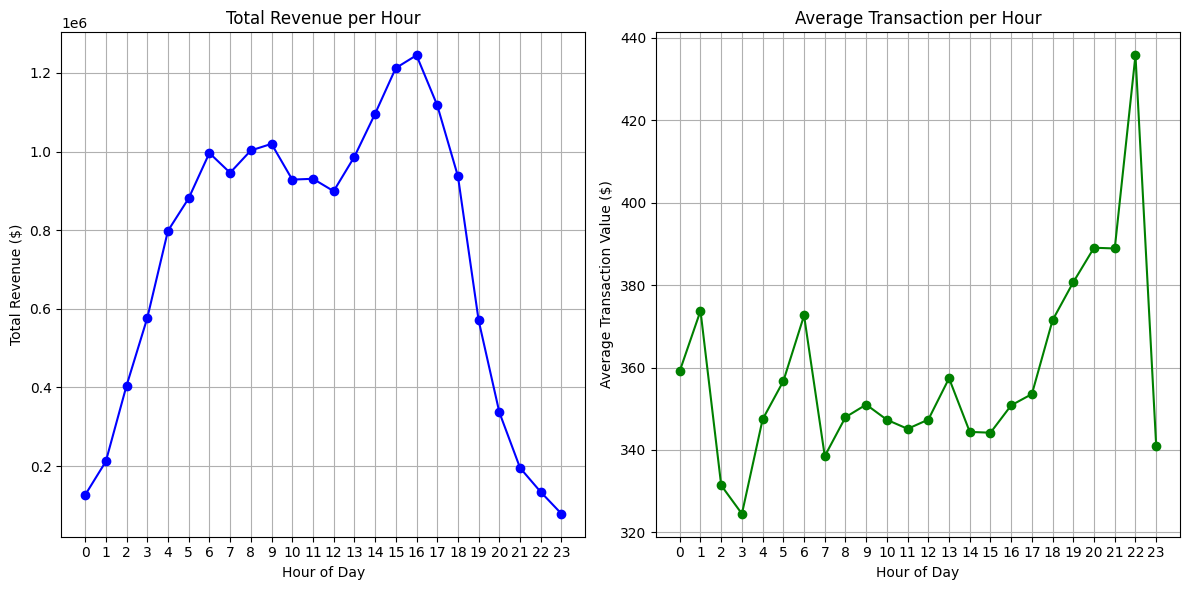

The hour with the highest total revenue is 16:00 with $1245082.35 in revenue.


In [21]:
# Hypothesis 3

#Get hour from the event_time column
df['hour'] = df['event_time'].dt.hour

#Calculate rev per hour
hourly_revenue = df.groupby('hour')['price'].sum()

#Calculate avg rev per hour
hourly_avg_revenue = df.groupby('hour')['price'].mean()

#Get a figure of totla rev per hour and avg transaction per hour
plt.figure(figsize=(12, 6))

#Total revenue per hour plot
plt.subplot(1, 2, 1)
plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o', color='blue', label='Total Revenue per Hour')
plt.title('Total Revenue per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(24))  # 24 hours in a day
plt.grid(True)

# Average transaction per hour plot
plt.subplot(1, 2, 2)
plt.plot(hourly_avg_revenue.index, hourly_avg_revenue.values, marker='o', color='green', label='Average Transaction per Hour')
plt.title('Average Transaction per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Transaction Value ($)')
plt.xticks(range(24))  # 24 hours in a day
plt.grid(True)

plt.tight_layout()
plt.show()

#Check for highest revenue hours
max_revenue_hour = hourly_revenue.idxmax()
max_revenue_value = hourly_revenue.max()
print(f"The hour with the highest total revenue is {max_revenue_hour}:00 with ${max_revenue_value:.2f} in revenue.")


With the first hypothesis, I aimed to investigate whether or not users engaging in multiple interactions with high-value items tended to have higher transactions. The analysis revealed that the mean and median transaction values for high-value sessions were lower than those for all sessions, inidicating that high-value sessions alone did not drive higher transaction amounts.

The second hypothesis was to determine if longer user sessions were associated with higher transactions. A correlation analysis showed a weak negative correlation between session duration and total revenue, suggesting longer sessios didn't reallycorrelate to higher transactions.

The third hypothesis proposed that users accessing the platform during certain hours might have higher transactions. The analysis showed that the hour with the highest total revenue was 16:00 (4 PM), so there was definitely a correlation between hour and transaction amount. 

Ultimately, hypothesis 1 and 2 were disproven by data, but Hypothesis 3 was definitely true. Factors like user behavior or platform activity at specific time drives those results.

Additional Hypothesis

1. Why was there a 500,000 spending difference observed between the highest spender and the second-highest spender?

    Hypothesis 1: There may be a unique case or requirments for users

    Hypothesis 2: There could be an error with data entry, glitch, or fraudulent activity

    Hypothesis 3: There could be promotional or bulk discounts

2. Why was one of the top 5 most expensive products purchased significantly less frequenctly than the other 4 products?

    Hypothesis 1: There may be perceived quality or value isseus with the product

    Hypothesis 2: The product could be targeted towards a smaller or niche market 

    Hypothesis 3: There could be an issue with supply or the availability of the product.

3. Why do some product categories consistently sell more than others in terms of revenue regardless of user activity levels. 

    Hypothesis 1: Popular brnds/ essential products generate higher revenue due to broader appeal

    Hypothesis 2: Certain categories maybe promoted more frequently

    Hypothesis 3: High-value products within specific categories contirbute disporportionately to overall category revenue.
    